/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


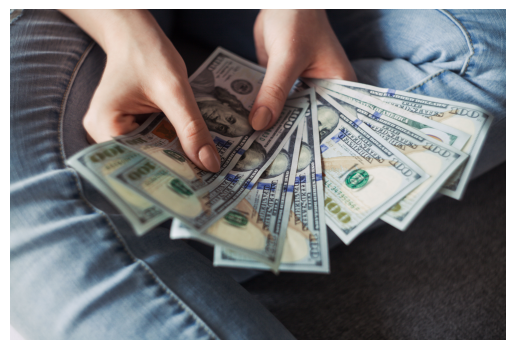

/kaggle/input/earnings-data/PSID1982.csv
/kaggle/input/earnings-image/earnings.jpg


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from PIL import Image

# Provide the path to the uploaded image
image_path = '/kaggle/input/earnings-image/earnings.jpg'

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### EXAMINING THE NEXUS BETWEEN FACTORS INFLUENCING EARNINGS AND WAGES

**Background and Definition of Variables**

This notebook examines the cross-section data on Income Dynamics for the year 1982, originating from Baltagi (2002). It contains 595 observations on 12 variables.

* experience = Years of full-time work experience.
* weeks = Weeks worked.
* occupation factor = Is the individual a white-collar ("white") or blue-collar ("blue") worker?
* industry factor = Does the individual work in a manufacturing industry?
* south factor = Does the individual reside in the South?
* smsa factor = Does the individual reside in a SMSA (standard metropolitan statistical area)?
* married factor. Is the individual married?
* gender factor indicating gender.
* union factor. Is the individual's wage set by a union contract?
* education = Years of education.
* ethnicity factor indicating ethnicity = Is the individual African-American ("afam") or not ("other")?
* wage = Wage.


**Importing and Cleaning the data**

In [2]:
earnings_data = pd.read_csv ('/kaggle/input/earnings-data/PSID1982.csv')
earnings_data.head() #displaying first five rows


,Unnamed: 0,experience,weeks,occupation,industry,south,smsa,married,gender,union,education,ethnicity,wage
0,1,9,32,white,yes,yes,no,yes,male,no,9,other,515
1,2,36,30,blue,yes,no,no,yes,male,no,11,other,912
2,3,12,46,blue,yes,no,no,no,male,yes,12,other,954
3,4,37,46,blue,no,no,yes,no,female,no,10,afam,751
4,5,16,49,white,no,no,no,yes,male,no,16,other,1474


In [3]:
earnings_data.drop(columns=['Unnamed: 0'], inplace=True) #drop unwanted column

In [4]:
earnings_data.shape #display the number of rows and columns

(595, 12)

In [5]:
earnings_data.info()  #displays summary of the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   experience  595 non-null    int64 
 1   weeks       595 non-null    int64 
 2   occupation  595 non-null    object
 3   industry    595 non-null    object
 4   south       595 non-null    object
 5   smsa        595 non-null    object
 6   married     595 non-null    object
 7   gender      595 non-null    object
 8   union       595 non-null    object
 9   education   595 non-null    int64 
 10  ethnicity   595 non-null    object
 11  wage        595 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 55.9+ KB


In [6]:
earnings_data.isna().sum() #checking for null data

experience    0
weeks         0
occupation    0
industry      0
south         0
smsa          0
married       0
gender        0
union         0
education     0
ethnicity     0
wage          0
dtype: int64

### **Data Visualization**

#### 1. An examination of the wage distribution
    * what wage bracket is the most prevalent in the population?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Wage')

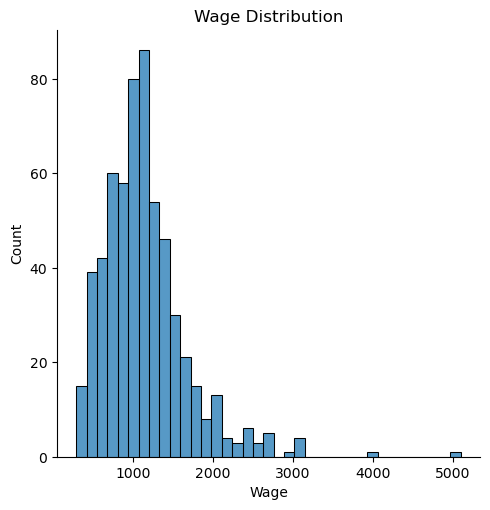

In [7]:

sns.displot(earnings_data, x="wage").set(title='Wage Distribution')
plt.xlabel("Wage")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Wage')

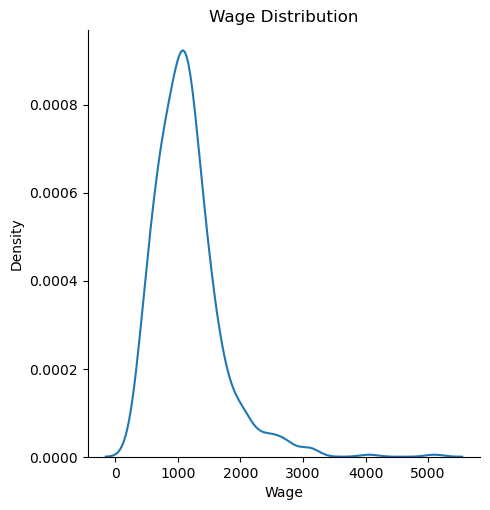

In [8]:
sns.displot(earnings_data, x="wage", kind="kde").set(title='Wage Distribution')

plt.xlabel("Wage")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Wage')

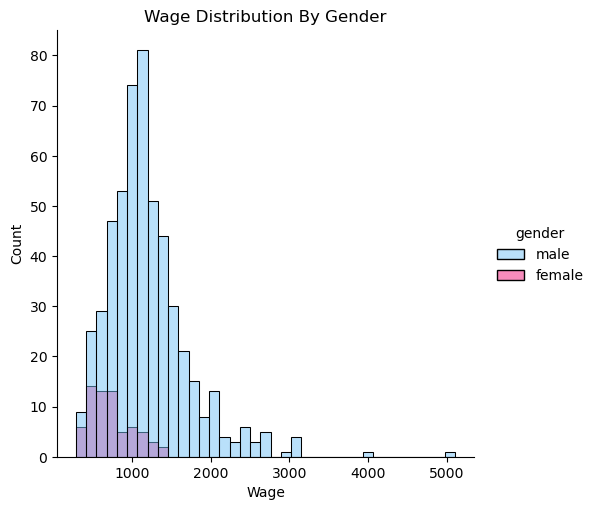

In [9]:
#Examining the spread further by gender

sns.displot(earnings_data, x="wage", hue="gender", palette = ['#75C2F6', '#F11A7B']).set(title='Wage Distribution By Gender')

plt.xlabel("Wage")


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Wage')

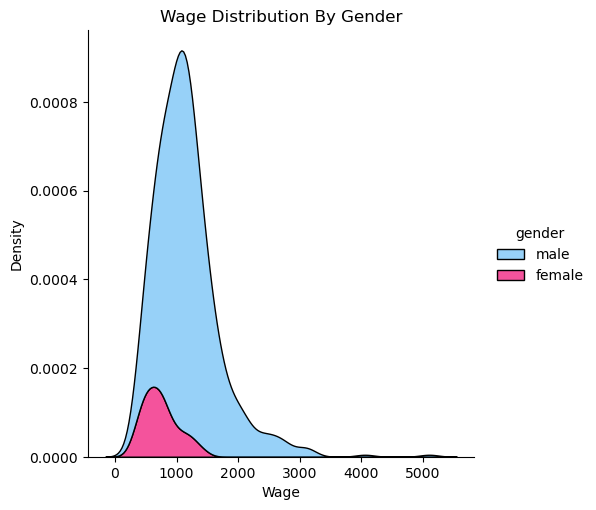

In [10]:
sns.displot(earnings_data, x="wage", hue="gender", kind="kde", multiple="stack", palette = ['#75C2F6', '#F11A7B']).set(title='Wage Distribution By Gender')

plt.xlabel("Wage")

#### 2. Examining the relationship between wages and years of full-time experience
    *  Do people with more years of work experience necessarily earn more?
    *  Does having a white/blue collar job affect wages positively, alongside years of experience garnered?  

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(43.04088888888889, 0.5, 'Wages')

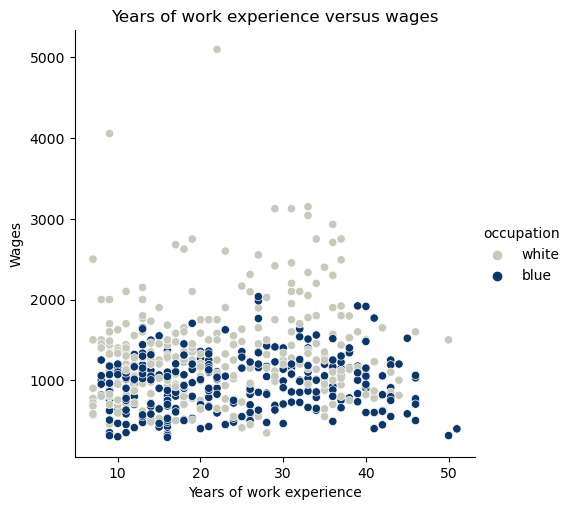

In [11]:

sns.relplot(data=earnings_data, x="experience", y="wage", hue='occupation', palette = ['#C7C9BB', '#0C356A']).set(title='Years of work experience versus wages')

plt.xlabel("Years of work experience")
plt.ylabel("Wages")


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


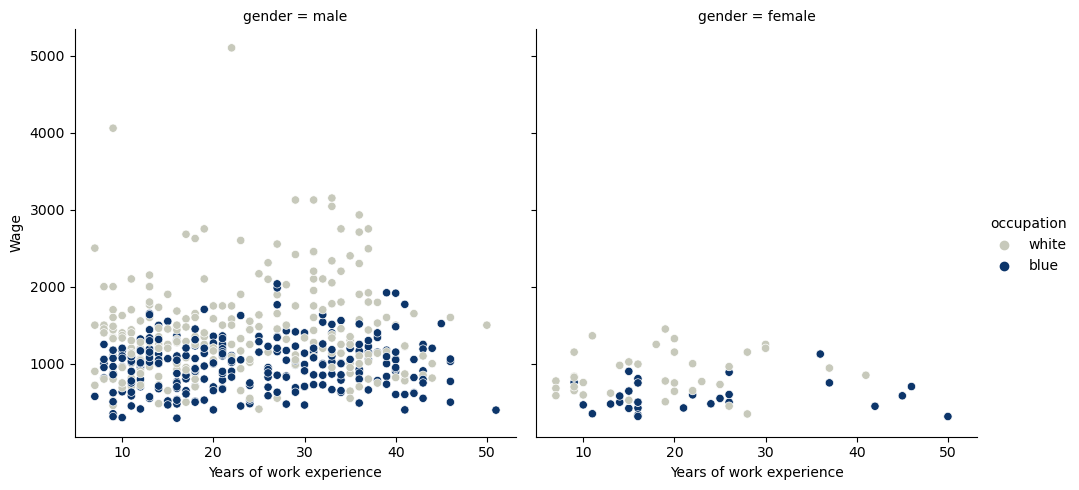

In [12]:
# Examining the data further by gender

sns.relplot(data=earnings_data, x="experience", y="wage", hue='occupation', col = 'gender', palette = ['#C7C9BB', '#0C356A']).set_axis_labels("Years of work experience", "Wage")

#### 3. An examination of occupation type vs wage
    * what is the influence of having a white/blue collar job on wages?
    * do people who have white collar jobs outearn their counterparts or vice-versa?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Wage')

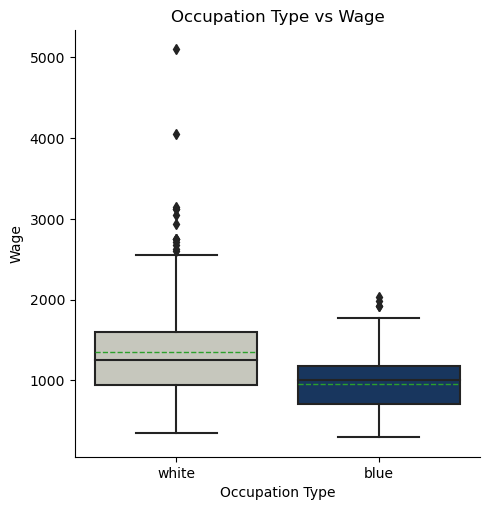

In [13]:
sns.catplot(data=earnings_data, x="occupation", y="wage", kind="box", meanline=True, showmeans=True, palette = ['#C7C9BB', '#0C356A']).set(title='Occupation Type vs Wage')
plt.xlabel("Occupation Type")
plt.ylabel("Wage")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(44.636444444444436, 0.5, 'Wage')

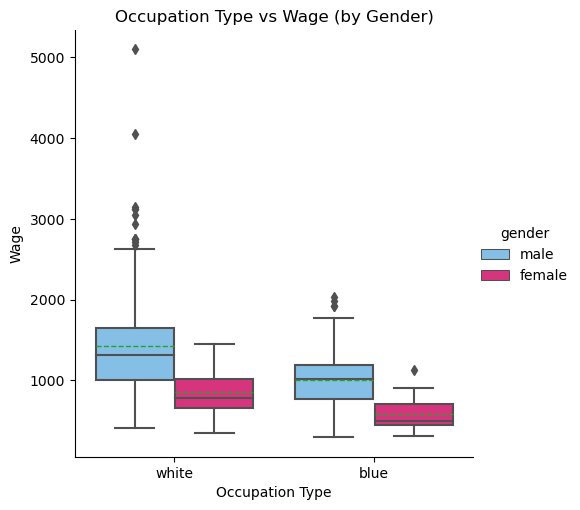

In [14]:
#Examining further by gender

sns.catplot(data=earnings_data, x="occupation", y="wage", hue= "gender", kind="box", meanline=True, showmeans=True, palette = ['#75C2F6', '#F11A7B']).set(title='Occupation Type vs Wage (by Gender)')
plt.xlabel("Occupation Type")
plt.ylabel("Wage")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(44.636444444444436, 0.5, 'Wage')

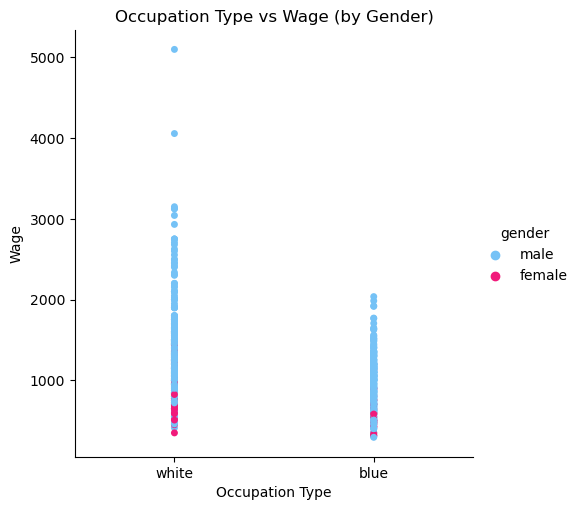

In [15]:
sns.catplot(data=earnings_data, x="occupation", y="wage", hue="gender", jitter=False, palette = ['#75C2F6', '#F11A7B']).set(title='Occupation Type vs Wage (by Gender)')
plt.xlabel("Occupation Type")
plt.ylabel("Wage")

#### 4. An examination of industry vs wage
    * do we have more males/females in the manufacturing industry?
    * do workers in manufacturing industry earn more?
    * does the above apply to both the female and male genders?

[Text(0.5, 1.0, 'Gender Count By Industry')]

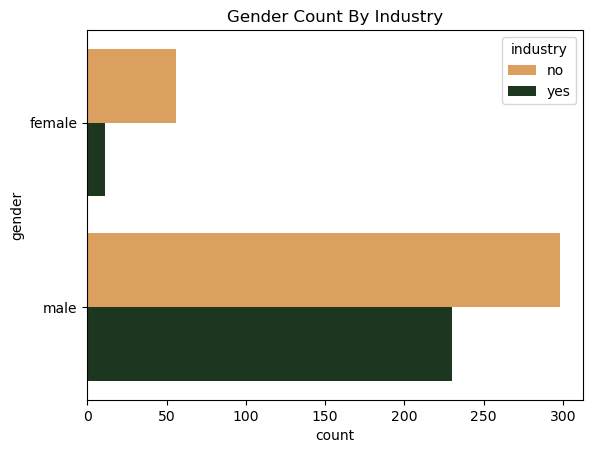

In [16]:
first_dimension = "gender"
horizontal_label = "count"
second_dimension = "industry"

sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            palette = [ '#F0A04B', '#183A1D'],
            data=earnings_data.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index()).set(title='Gender Count By Industry')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Wage')

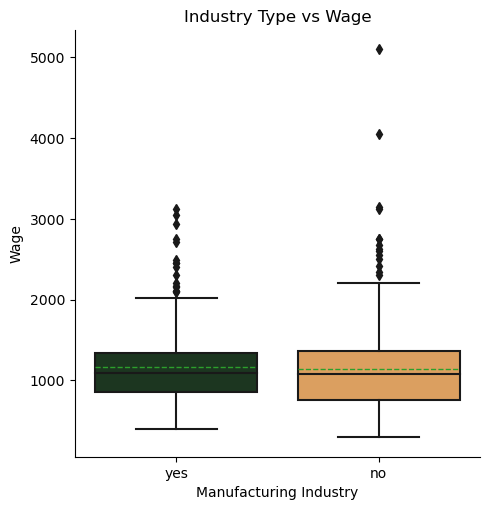

In [17]:
sns.catplot(data=earnings_data, x="industry", y="wage", kind="box", meanline=True, showmeans=True, palette = ['#183A1D', '#F0A04B']).set(title='Industry Type vs Wage')
plt.xlabel("Manufacturing Industry")
plt.ylabel("Wage")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


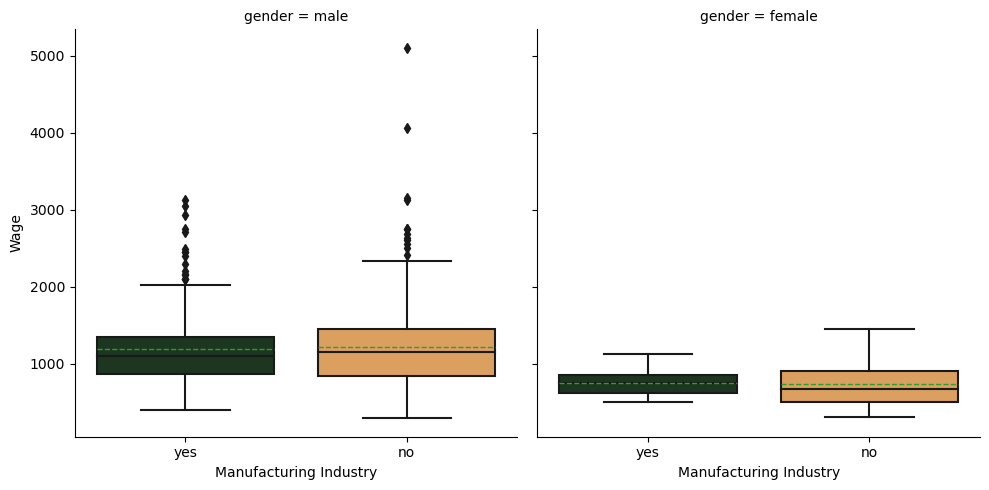

In [18]:
#Examining further by gender

sns.catplot(data=earnings_data, x="industry", y="wage", kind="box", col="gender", meanline=True, showmeans=True, palette = ['#183A1D', '#F0A04B']).set_axis_labels("Manufacturing Industry", "Wage")


#### 5. An examination of occupation type vs number of weeks worked
    * do people in white collar jobs work extra weeks, therefore explaining the reason for their higher wages?

/tmp/ipykernel_20/2674420159.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=earnings_data, x="occupation", y="weeks", jitter=False, palette = ['#C7C9BB', '#0C356A']).set(title='Occupation Type vs Number of Weeks')
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444445, 0.5, 'Weeks worked')

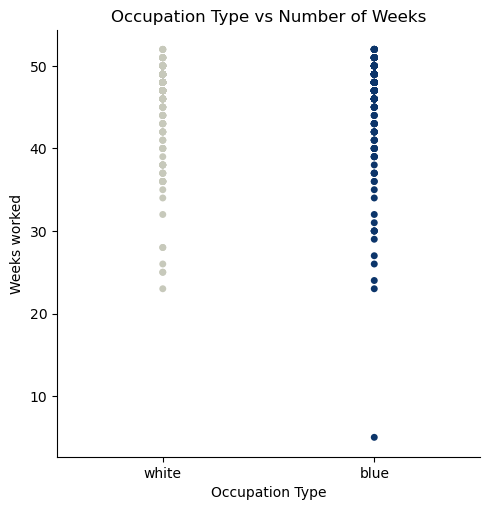

In [19]:
sns.catplot(data=earnings_data, x="occupation", y="weeks", jitter=False, palette = ['#C7C9BB', '#0C356A']).set(title='Occupation Type vs Number of Weeks')
plt.xlabel("Occupation Type")
plt.ylabel("Weeks worked")

#### 6. Does living in the South pose an advantage to the groups examined?
    * do people in the South earn more?
    * is this subject to gender?    

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(44.636444444444436, 0.5, 'Wage')

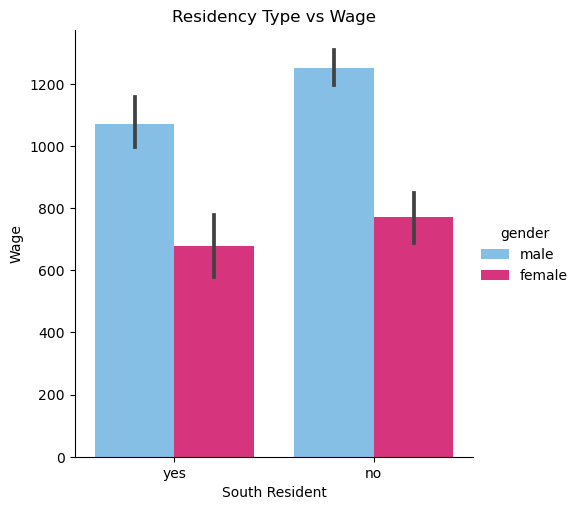

In [20]:
sns.catplot(data=earnings_data, x="south", y="wage", hue="gender", kind="bar", palette = ['#75C2F6', '#F11A7B']).set(title='Residency Type vs Wage')
plt.xlabel("South Resident")
plt.ylabel("Wage")

#### 7. Does living in a Standard Metropolitan Statistical Area (SMSA) pose an advantage to the groups examined?
    * do people in the SMSA earn more?
    * is this subject to gender?    

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(44.636444444444436, 0.5, 'Wage')

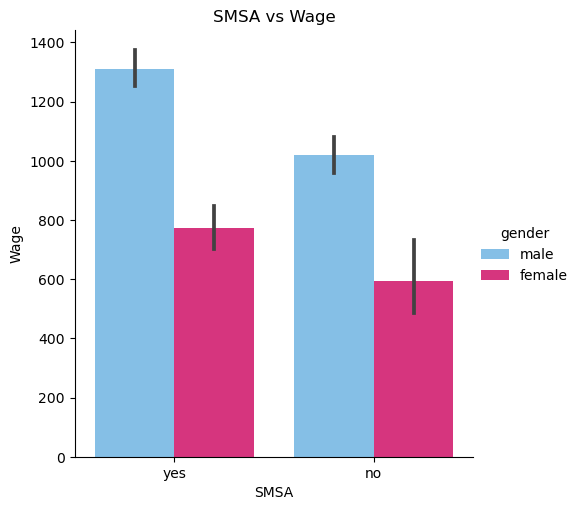

In [21]:
sns.catplot(data=earnings_data, x="smsa", y="wage", hue="gender", kind="bar", order=['yes', 'no'], palette = ['#75C2F6', '#F11A7B']).set(title='SMSA vs Wage')
plt.xlabel("SMSA")
plt.ylabel("Wage")

#### 8. What is the contribution of ethnicity to wages?
    * do African Americans earn more than their counterparts?
    * is the hypothesis true for both genders?    

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


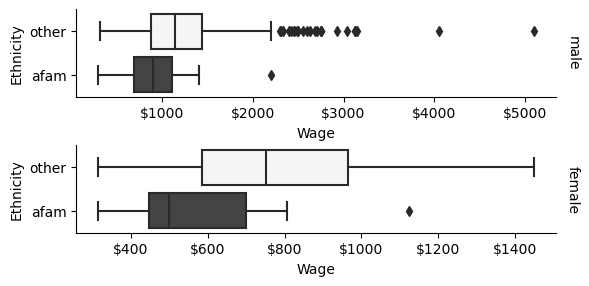

In [22]:
g = sns.catplot(
    data=earnings_data,
    x="wage", y="ethnicity", row="gender",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4, palette = ['#F5F5F5', '#444444']
)
g.set(xlabel="Wage", ylabel="Ethnicity")
g.set_titles(row_template="{row_name}")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

#### 9. What is the relationship between years of education and wages?
    * do people with higher years of education earn more?
    * is the hypothesis true for both genders, considering their marital status as well?    

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


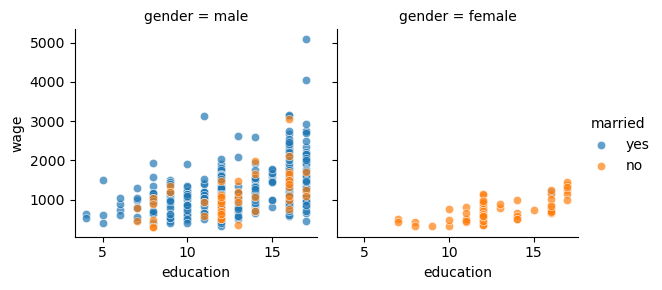

In [23]:
g = sns.FacetGrid(earnings_data, col="gender", hue="married")
g.map(sns.scatterplot, "education", "wage", alpha=.7)
g.add_legend()

#### 10. What is the relationship between the wages set by union and wages?
    * do employees who have their wages set by union earn more?  

/tmp/ipykernel_20/4142516779.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=earnings_data, x="union", y="wage", palette = [ '#ECB390', '#DD4A48']).set(title='Union-Set-Wages vs Wage')
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.9305555555555554, 0.5, 'Wage')

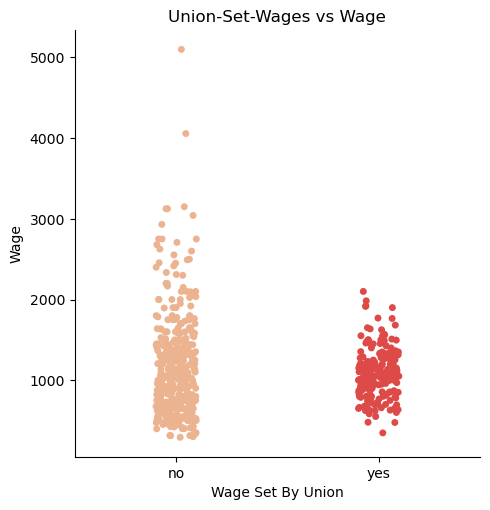

In [24]:
sns.catplot(data=earnings_data, x="union", y="wage", palette = [ '#ECB390', '#DD4A48']).set(title='Union-Set-Wages vs Wage')
plt.xlabel("Wage Set By Union")
plt.ylabel("Wage")

#### 11. What is the relationship between number of weeks worked and wages?
    * do employees who have their wages set by union earn more?  

Text(0, 0.5, 'Wage')

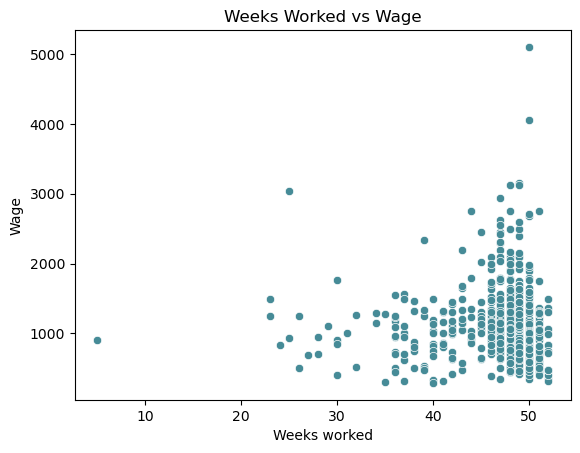

In [25]:
sns.scatterplot(x=earnings_data['weeks'], y=earnings_data['wage'], color='#468B97').set(title='Weeks Worked vs Wage');
plt.xlabel("Weeks worked")
plt.ylabel("Wage")

**SUMMARY**

In summary, we can deduce the following from the visualizations:
    * Most employees earned wages between 1000 and 1150
    * Most of the females earned significantly lower than their male counterparts
    * People with 30 to 40 years of work experience earned the highest, with white-collar jobs paying more than blue-collar jobs
    * We have more females and males in non-manufacturing industries
    * The mean wage in manufacturing industry is just slightly higher than that of non-manufacturing industries
    * Residing in the South was quite a disadvantage, as residents earned significantly lower than their counterparts
    * Living in a Standard Metropolitan Statistical Area (SMSA) was an advantage to wage earned
    * Other ethnicity groups earned higher than their African American counterparts
    * The higher the years of education, the higher the wages earned
    * Employees who had their wages set by union earned lower
    * There is a positive relationship between number of weeks worked and wages
    
    